In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#cargar csv desde MyDrive/proyecto_beca
import pandas as pd

#becas_sbu_2023
becas_s = pd.read_csv('drive/MyDrive/proyecto_beca/becas_sbu_2023_anonim.csv')

In [ ]:
# dimensiones iniciales
print(f"Dimensiones iniciales: ({becas_s.shape[0]}, {becas_s.shape[1]})")

Dimensiones iniciales: (2044, 213)


ELIMINACION DE COLUMNAS INNECESARIAS

In [ ]:
# Lista de datasets y nombres para procesar
datasets = {
    "becas_s": becas_s,
}

# Iterar sobre los datasets para listar columnas y tipos
for key, value in datasets.items():
  print(f"DATASET:{key}")
  for column in value.columns:
    print(f"\tCol:{column} T:{value[column].dtype} ")
  print("\n\n\n")


DATASET:becas_s
	Col:numero_de_solicitud T:int64 
	Col:convocatoria T:object 
	Col:fecha_de_inicio_del_formulario T:object 
	Col:fecha_finalizacion_del_formulario T:object 
	Col:motivo_de_excepcion T:object 
	Col:nacionalidad T:object 
	Col:residencia T:object 
	Col:edad T:int64 
	Col:sexo T:object 
	Col:genero T:object 
	Col:estado_civil T:object 
	Col:coincide_el_domicilio_actual_dela_postulante_con_el_de_su_dni T:object 
	Col:departamento_postulante T:object 
	Col:provincia_postulante T:object 
	Col:postulante_se_mantiene_solao_y_no_tiene_familia_a_cargo T:object 
	Col:distancia T:int64 
	Col:unidad_academica T:object 
	Col:sede T:object 
	Col:carrera T:object 
	Col:ano_cursado_durante_ T:float64 
	Col:anos_de_actividad_academica_desde_el_ingreso_hasta_el__inclusiv T:float64 
	Col:cantidad_de_materias_aprobadas_hasta_ T:float64 
	Col:cantidad_de_materias_dictadas_hasta_el_ano__segun_plan_de_estud T:float64 
	Col:total_de_materias_del_plan_de_estudios_de_la_carrera T:float64 
	Col:es

In [ ]:
# Configuracion para ver todo el output de .head
pd.set_option('display.max_columns', None)
becas_s.head()

numero_de_solicitud                                       convocatoria  \
0                10310  Convocatoria a Becas 2023-Ingresantes/Estudian...   
1                10267  Convocatoria a Becas 2023-Ingresantes/Estudian...   
2                10226  Convocatoria a Becas 2023-Ingresantes/Estudian...   
3                10205  Convocatoria a Becas 2023-Ingresantes/Estudian...   
4                10199  Convocatoria a Becas 2023-Ingresantes/Estudian...   

  fecha_de_inicio_del_formulario fecha_finalizacion_del_formulario  \
0                      28/2/2023                          7/3/2023   
1                      28/2/2023                         28/2/2023   
2                      28/2/2023                          6/3/2023   
3                      28/2/2023                          9/3/2023   
4                      28/2/2023                          9/3/2023   

                             motivo_de_excepcion nacionalidad  residencia  \
0  Estudiante con problemas de acceso al sistema    Argentina  Permanente   
1                                            NaN    Argentina  Permanente   
2  Estudiante con problemas de acceso al sistema    Argentina  Permanente   
3  Estudiante con problemas de acceso al sistema    Argentina  Permanente   
4  Estudiante con problemas de acceso al sistema    Argentina  Permanente   

   edad       sexo genero estado_civil  \
0    22   Femenino  Mujer    Soltero/a   
1    20  Masculino  Varón    Soltero/a   
2    33   Femenino  Mujer    Soltero/a   
3    62   Femenino  Mujer     Casado/a   
4    19   Femenino  Mujer    Soltero/a   

  coincide_el_domicilio_actual_dela_postulante_con_el_de_su_dni  \
0                                                 SI              
1                                                 SI              
2                                                 SI              
3                                                 SI              
4                                                 SI              

  departamento_postulante provincia_postulante  \
0              San Rafael              Mendoza   
1               Rivadavia              Mendoza   
2              Guaymallén              Mendoza   
3              Guaymallén              Mendoza   
4              San Rafael              Mendoza   

  postulante_se_mantiene_solao_y_no_tiene_familia_a_cargo  distancia  \
0  No. El domicilio de cursado es distinto al de ...              23   
1  No. El domicilio de cursado es el mismo al de ...              61   
2  No. El domicilio de cursado es el mismo al de ...              12   
3  No. El domicilio de cursado es el mismo al de ...              13   
4  No. El domicilio de cursado es el mismo al de ...               0   

      unidad_academica               sede  \
0  Ciencias Económicas         San Rafael   
1  Ciencias Económicas  Ciudad de Mendoza   
2   Filosofía y Letras  Ciudad de Mendoza   
3              Derecho  Ciudad de Mendoza   
4                  ITU         San Rafael   

                                            carrera  ano_cursado_durante_  \
0                                  Contador Público                   2.0   
1                                  Contador Público                   2.0   
2    Profesorado de Grado Universitario en Historia                   NaN   
3                                          Abogacía                   NaN   
4  Tecnicatura Universitaria en Gestión de Empresas                   NaN   

   anos_de_actividad_academica_desde_el_ingreso_hasta_el__inclusiv  \
0                                                5.0                 
1                                                2.0                 
2                                                NaN                 
3                                                NaN                 
4                                                NaN                 

   cantidad_de_materias_aprobadas_hasta_  \
0                                    5.0   
1                      

In [ ]:
# Calcular proporcion de datos faltantes por columna
import numpy as np

def prop_faltantes(df):
  # Calcular la cantidad total de filas para calcular proporciones
  total_filas = df.shape[0]

  # Reemplazar distintos nombres de faltantes por np.nan
  df = df.replace(["nan", "None", "N/A", "?", "", " "], np.nan)

  # Calcular la cantidad de valores faltantes por columna para calcular dos columnas
  valores_faltantes = df.isnull().sum()

  # Crear un DataFrame con la cantidad de valores faltantes y su proporción
  faltantes_df = pd.DataFrame({
      'Columna': df.columns,
      'Proporción de Datos Faltantes': valores_faltantes / total_filas,
      'Cantidad de Datos Faltantes': valores_faltantes
  })

  #Se ordenan las columnas en función de la columna "Proporción de Datos Faltantes"
  faltantes_df = faltantes_df.sort_values(by='Proporción de Datos Faltantes', ascending=False, ignore_index=True)


  # # Mostrar los resultados
  print("Columnas con valores faltantes:")
  print(faltantes_df.head(50).to_string(index=False))
  print("...")

  return faltantes_df

In [ ]:
# Visualizar proporciones
import matplotlib.pyplot as plt
import seaborn as sns

def visualizar_valores_faltantes(df):
  # Configurar el estilo del gráfico
  sns.set(style="whitegrid")

  # Crear un gráfico de barras para visualizar la proporción de valores faltantes
  plt.figure(figsize=(12, 6))
  sns.barplot(x='Proporción de Datos Faltantes', y='Columna', data=df)
  plt.title('Proporción de Valores Faltantes por Columna')
  plt.xlabel('Proporción de Valores Faltantes')
  plt.ylabel('Columnas')
  plt.xlim(0, 1)  # Limitar el eje x entre 0 y 1 para una mejor visualización
  plt.show()

In [ ]:
# Almacenar el df con proporciones de faltantes
faltantes_df = prop_faltantes(becas_s)

Columnas con valores faltantes:
                                                        Columna  Proporción de Datos Faltantes  Cantidad de Datos Faltantes
  beca_para_estudiantes_de_grado_utiliza_el_servicio_de_comedor                       1.000000                         2044
beca_de_residencia_universitaria_utiliza_el_servicio_de_comedor                       1.000000                         2044
            notificacion_beca_para_estudiantes_con_discapacidad                       1.000000                         2044
beca_para_estudiantes_con_discapacidad_utiliza_el_servicio_de_c                       1.000000                         2044
                                           mes_de_adjudicacion8                       1.000000                         2044
    notificacion_beca_para_estudiantes_con_identidades_plurales                       1.000000                         2044
beca_para_estudiantes_con_identidades_plurales_utiliza_el_servi                       1.000000      

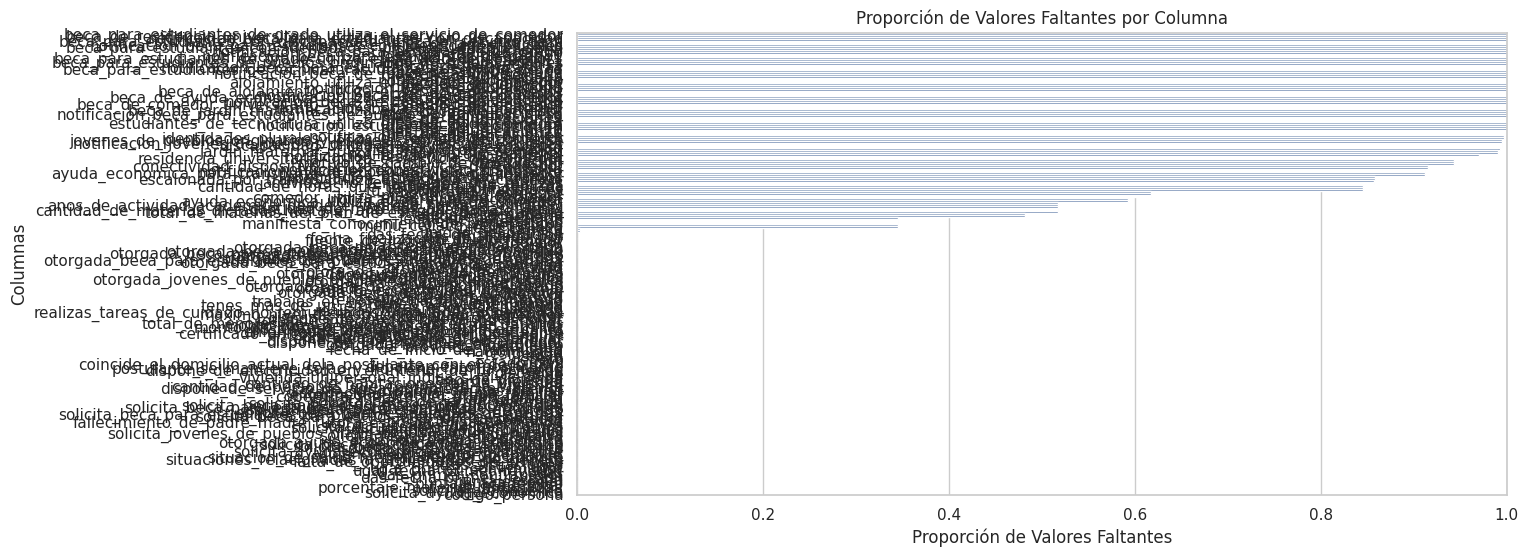

In [ ]:
visualizar_valores_faltantes(faltantes_df)

In [ ]:
#Eliminación de columnas con mas de 50% de datos faltantes (se eliminan los de mas de 20% )
faltantes_df50 = faltantes_df[faltantes_df['Proporción de Datos Faltantes'] < 0.5]
faltantes_df = faltantes_df[faltantes_df['Proporción de Datos Faltantes'] < 0.3]

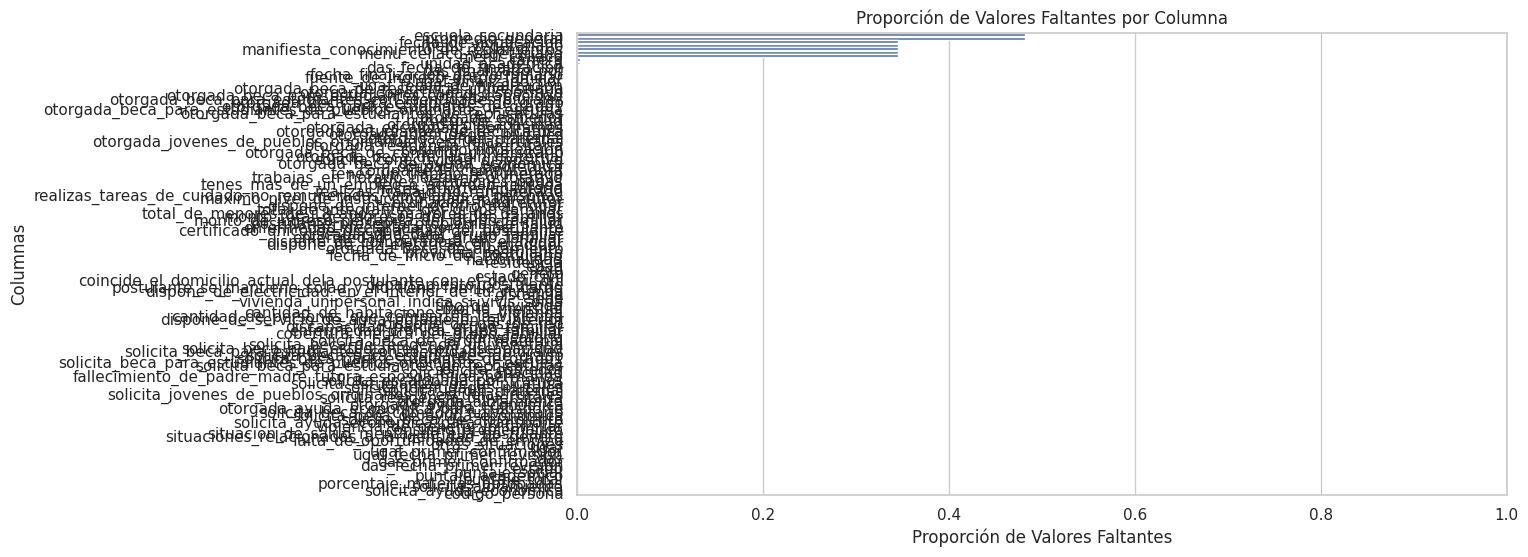

In [ ]:
# Solo los valores con menos de 50% de valores faltantes
visualizar_valores_faltantes(faltantes_df50)

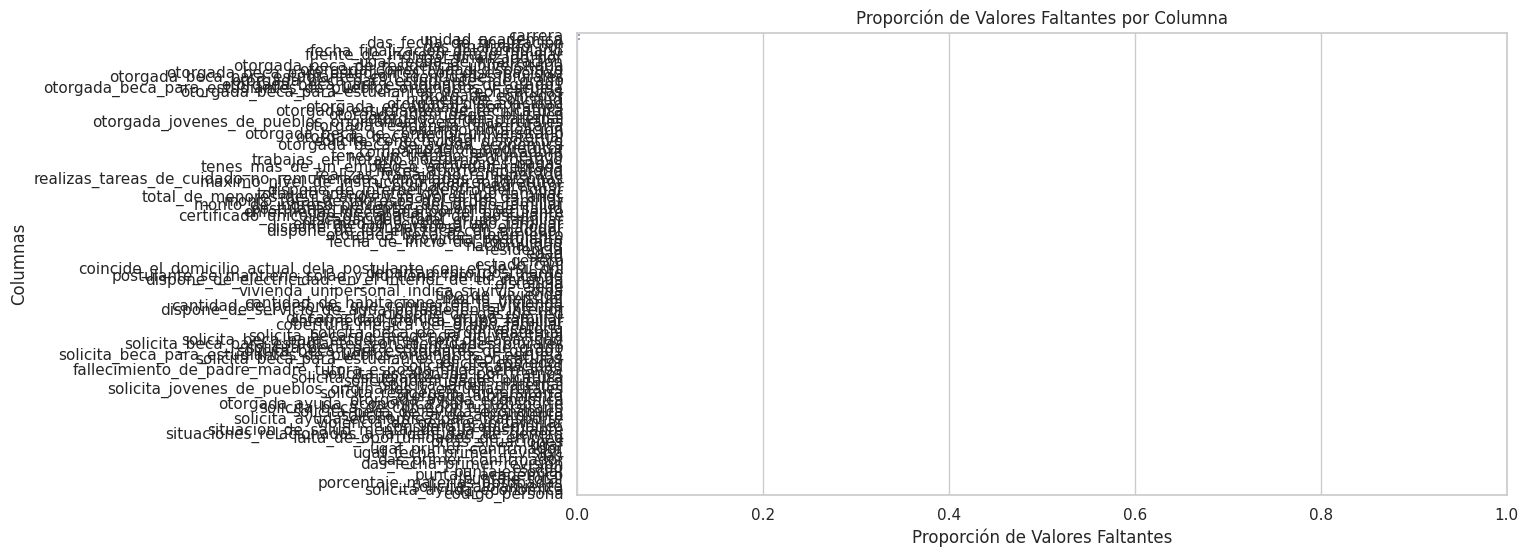

In [ ]:
# Solo los valores con menos de 30% de valores faltantes
visualizar_valores_faltantes(faltantes_df)

In [ ]:
# # Mostrar los resultados del dataset con estas columnas eliminadas
print("Columnas con valores faltantes:")
print(faltantes_df.head(100).to_string(index=False))

#imprimir fila con Columna = motivo_de_excepcion
# print(faltantes_df[faltantes_df['Columna'] == 'carrera'])

Columnas con valores faltantes:
                                                        Columna  Proporción de Datos Faltantes  Cantidad de Datos Faltantes
                                                        carrera                       0.003425                            7
                                               unidad_academica                       0.003425                            7
                                      das_fecha_de_finalizacion                       0.000489                            1
                                             das_finalizado_por                       0.000489                            1
                              fecha_finalizacion_del_formulario                       0.000489                            1
                               fuente_de_ingreso_grupo_familiar                       0.000489                            1
                                            ugaf_finalizado_por                       0.000489      

In [ ]:
#Guardar en una variable con los faltantes
columns_to_keep = faltantes_df['Columna']

# Conservar en becas2 las columns_to_keep
becas2 = becas_s[columns_to_keep]

In [ ]:
# Tamaño actual
print(f"Tamaño de dataset antes de eliminación: {becas_s.shape[1]}")
print(f"Tamaño de dataset despues de eliminación: {becas2.shape[1]}")

Tamaño de dataset antes de eliminación: 213
Tamaño de dataset despues de eliminación: 123


In [ ]:
# imprimir el maximo numero en la columna distancia
print(becas2['edad'].max())

65


In [ ]:
# imprimir el maximo numero en la columna distancia
print(becas2['distancia'].max())

2900


In [ ]:
# Vista head para seleccionar manualmente otras columnas no deseadas
becas2.head(50)

carrera  \
0                                    Contador Público   
1                                    Contador Público   
2      Profesorado de Grado Universitario en Historia   
3                                            Abogacía   
4    Tecnicatura Universitaria en Gestión de Empresas   
5                                    Contador Público   
6                                    Contador Público   
7   Profesorado Universitario de Pedagogía Terapéu...   
8                      Licenciatura en Arte Dramático   
9                                            Abogacía   
10                     Licenciatura en Trabajo Social   
11    Profesorado de Grado Universitario en Portugués   
12  Tecnicatura Universitaria en Desarrollo de Sof...   
13  Profesorado de Grado Universitario en Artes Vi...   
14  Profesorado de Grado Universitario en Ciencias...   
15   Tecnicatura Universitaria en Gestión de Empresas   
16                                   Contador Público   
17                                           Abogacía   
18                                        Odontología   
19  Profesorado Universitario de Educación para Pe...   
20                              Ingeniería Agronómica   
21                             Licenciatura en Letras   
22                                           Abogacía   
23  Profesorado Universitario de Educación para Pe...   
24  Licenciatura en Ciencia Políticas y Administra...   
25                                           Medicina   
26  Tecnicatura Universitaria en Producción Indust...   
27     Profesorado de Grado Universitario en Historia   
28                            Licenciatura en Turismo   
29                          Ingeniería en Mecatrónica   
30                                           Abogacía   
31     Profesorado Universitario de Educación Inicial   
32                          Licenciatura en Geografía   
33                     Traductorado Público en Inglés   
34                     Licenciatura en Arte Dramático   
35                                   Contador Público   
36                            Licenciatura en Turismo   
37        Contador Público Nacional y Perito Partidor   
38                                    Artes Plásticas   
39    Profesorado Universitario de Educación Primaria   
40          Tecnicatura Universitaria en Hemoterapia    
41                     Licenciatura en Trabajo Social   
42  Tecnicatura Universitaria en Logística y Trans...   
43       Profesorado de Grado Universitario en Música   
44                     Traductorado Público en Inglés   
45        Contador Público Nacional y Perito Partidor   
46      Tecnicatura Universitaria en Educación Social   
47  Profesorado de Grado Universitario en Lengua y...   
48                                   Contador Público   
49   Tecnicatura en Interpretación de Lengua de Señas   

                 unidad_academica das_fecha_de_finalizacion  \
0             Ciencias Económicas                14/04/2023   
1             Ciencias Económicas                14/04/2023   
2              Filosofía y Letras                14/04/2023   
3                         Derecho                14/04/2023   
4                             ITU                14/04/2023   
5             Ciencias Económicas                18/03/2023   
6             Ciencias Económicas                14/04/2023   
7                       Educación                18/03/2023   
8                  Artes y Diseño                18/03/2023   
9                         Derecho                14/04/2023   
10  Ciencias Políticas y Sociales                18/03/2023   
11             Filosofía y Letras                11/04/2023   
12                            ITU                11/04/2023   
13                 Artes y Diseño                14/04/2023   
14             Filosofía y Letras                18/03/2023   
15                            ITU                11/04/2023   
16            Ciencias Económicas                14/04/2023   
17  

In [ ]:
#Eliminar columnas irrelevantes
becas2 = becas2.drop([
                       'fecha_de_inicio_del_formulario', 'fecha_finalizacion_del_formulario',
                       'puntaje_total',
                       'das_fecha_de_finalizacion',
                       'ugaf_fecha_de_finalizacion', 'numero_de_solicitud',

                       'monto_mensual', 'das',	'ugaf_fecha_primer_revision',
                       'das_fecha_primer_revision', 'ugaf', 'das_finalizado_por', 'ugaf_finalizado_por',
                       'das_primer_confirmador', 'ugaf_primer_confirmador',

                      #  'departamento_grupo_familiar', 'ano_de_ingreso_a_la_universidad', 'cuil',
                      #  'email', 'fecha_de_nacimiento', 'calle_postulante', 'numero_postulante',
                      #  'telefono_celular', 'apellidos', 'nombres', 'casa_postulante',
                      #  'calle_grupo_familiar',	'numero_grupo_familiar', 'localidad_postulante'
                      #  'localidad_grupo_familiar',	'provincia_grupo_familiar',
                      #  'telefono_celular1', 'piso_postulante', 'manzana_postulante',
                      #  'barrio_postulante', 'codigo_postal_postulante', 'telefono_fijo',
                      #  'telefono_celular_alternativo', 'nombre_autopercibido',
                      #  'depto_postulante', 'piso_grupo_familiar', 'depto_grupo_familiar',
                      #  'manzana_grupo_familiar', 'casa_grupo_familiar', 'barrio_grupo_familiar',
                      #  'codigo_postal_grupo_familiar', 'telefono_fijo1', 'telefono_celular_alternativo1'
                       ],
                         axis=1)

In [ ]:
# Tamaño actual
print(f"Tamaño de dataset antes de eliminación: {becas_s.shape[1]}")
print(f"Tamaño de dataset despues de eliminación: {becas2.shape[1]}")

Tamaño de dataset antes de eliminación: 213
Tamaño de dataset despues de eliminación: 108


In [ ]:
becas2.head()

carrera     unidad_academica  \
0                                  Contador Público  Ciencias Económicas   
1                                  Contador Público  Ciencias Económicas   
2    Profesorado de Grado Universitario en Historia   Filosofía y Letras   
3                                          Abogacía              Derecho   
4  Tecnicatura Universitaria en Gestión de Empresas                  ITU   

                    fuente_de_ingreso_grupo_familiar  \
0                Trabajo informal/Servicio doméstico   
1                                     Trabajo formal   
2                                     Trabajo formal   
3  Planes sociales/Cuota aliminataria, AUH, Pasan...   
4                                     Trabajo formal   

  otorgada_beca_de_residencia_universitaria otorgada_conectividad_dispositivo  \
0                                        No                                No   
1                                        No                                No   
2                                        No                                No   
3                                        No                                No   
4                                        No                                No   

  otorgada_beca_para_estudiantes_con_discapacidad  \
0                                              No   
1                                              No   
2                                              No   
3                                              No   
4                                              No   

  otorgada_beca_para_estudiantes_con_identidades_plurales  \
0                                                 No        
1                                                 No        
2                                                 No        
3                                                 No        
4                                                 No        

  otorgada_beca_para_estudiantes_de_grado  \
0                                      No   
1                                      No   
2                                      No   
3                                      No   
4                                      No   

  otorgada_beca_para_estudiantes_de_grado1  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  otorgada_beca_para_estudiantes_de_pueblos_originarios_y_escuela  \
0                                                 No                
1                                                 No                
2                                                 No                
3                                                 No                
4                                                 No                

  otorgada_beca_para_estudiantes_de_tecnicaturas    otorgada_comedor  \
0                                             No             Titular   
1                                             No             Titular   
2                                             No                  No   
3                                             No  Suplente inmediato   
4                                             No                  No   

  otorgada_discapacidad otorgada_escalonada_por_tramos  \
0                    No                       Suplente   
1                    No                       Suplente   
2                    No                             No   
3                    No                       Suplente   
4                    No                             No   

  otorgada_estudiantes_de_tecnicatura otorgada_identidades_plurales  \
0                                  No                            No   
1                                  No                            No   
2                                  No                            No   
3                                  No           

# Normalización de 0 a 100 (se hará en el Notebook de training)

distancia mas de 1000 (max 2900)

cantidad_de_habitaciones_en_la_vivienda

cantidad_de_personas_que_comparten_la_vivienda

dispone_de_servicio_de_agua_potable_en_el_interior

edad (max 65)

puntaje_social (0-100)

puntaje_academico (0-10)

porcentaje_materias_aprobadas (0-100)

total_de_integrantes_del_grupo_familiar

total_de_menores_de_18_anos_y_mayores_de_65_anos

monto_total_de_ingresos_del_grupo_familiar

monto_de_ingreso_percapita_del_grupo_familiar


In [ ]:
#contar valores faltantes en el dataset
faltantes_df = prop_faltantes(becas2)

Columnas con valores faltantes:
                                                        Columna  Proporción de Datos Faltantes  Cantidad de Datos Faltantes
                                                        carrera                       0.003425                            7
                                               unidad_academica                       0.003425                            7
                               fuente_de_ingreso_grupo_familiar                       0.000489                            1
                                          solicita_discapacidad                       0.000000                            0
                 solicita_beca_para_estudiantes_de_tecnicaturas                       0.000000                            0
solicita_beca_para_estudiantes_de_pueblos_originarios_y_escuela                       0.000000                            0
                       solicita_beca_para_estudiantes_de_grado1                       0.000000      

In [ ]:
# eliminar filas con faltantes
becas2 = becas2.dropna()
faltantes_df = prop_faltantes(becas2)

Columnas con valores faltantes:
                                                        Columna  Proporción de Datos Faltantes  Cantidad de Datos Faltantes
                                                        carrera                            0.0                            0
                              enfermedad_cronica_grupo_familiar                            0.0                            0
                                               solicita_comedor                            0.0                            0
                 solicita_beca_para_estudiantes_de_tecnicaturas                            0.0                            0
solicita_beca_para_estudiantes_de_pueblos_originarios_y_escuela                            0.0                            0
                       solicita_beca_para_estudiantes_de_grado1                            0.0                            0
                        solicita_beca_para_estudiantes_de_grado                            0.0      

In [ ]:
#contar datos nan
becas2.isna().sum()

carrera                                      0
unidad_academica                             0
fuente_de_ingreso_grupo_familiar             0
otorgada_beca_de_residencia_universitaria    0
otorgada_conectividad_dispositivo            0
                                            ..
puntaje_academico                            0
porcentaje_materias_aprobadas                0
solicita_alojamiento                         0
solicita_ayuda_economica                     0
codigo_persona                               0
Length: 108, dtype: int64

In [ ]:
# comprobar que dni tiene valores unicos
print(becas2['codigo_persona'].nunique())

#imprimir cantidad de rows de becas2
print(becas2.shape[0])

2036
2036


# Eliminación de columnas con poca información

Columnas altamente correlacionadas: []


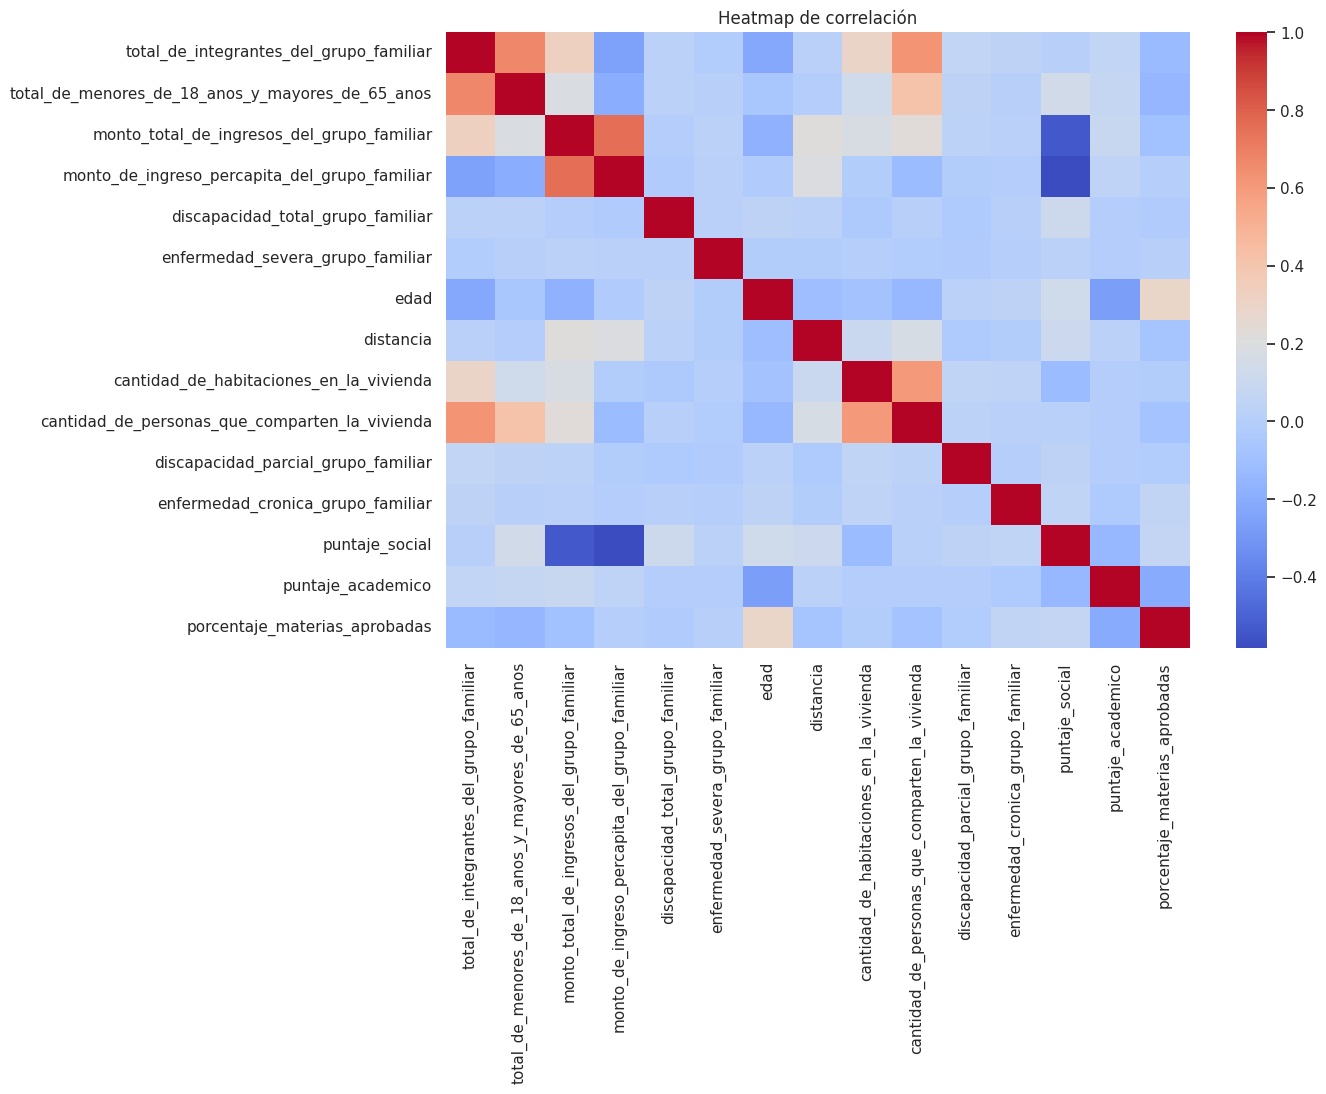

In [ ]:
# Multicolinealidad

import numpy as np

# Seleccionar solo columnas numéricas
df = becas2.select_dtypes(include=['number'])

corr_matrix = df.corr().abs()  # Matriz de correlación en valores absolutos
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Tomar solo la parte superior
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]

print("Columnas altamente correlacionadas:", high_corr_features)
df.drop(columns=high_corr_features, inplace=True)  # Eliminar columnas redundantes

import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Heatmap de correlación")
plt.show()


In [ ]:
# Variance Threshold

from sklearn.feature_selection import VarianceThreshold

# Seleccionar solo columnas numéricas
becas2_numerico = becas2.select_dtypes(include=['number'])

# Aplicar VarianceThreshold
selector = VarianceThreshold(threshold=0.01)  # Umbral de varianza mínima
df_reducido = selector.fit_transform(becas2_numerico)

# Convertir el resultado de nuevo en un DataFrame con las columnas seleccionadas
df_reducido = pd.DataFrame(df_reducido, columns=becas2_numerico.columns[selector.get_support()])

# Ver las columnas eliminadas
columnas_eliminadas = becas2_numerico.columns[~selector.get_support()]
print(f"Columnas eliminadas: {columnas_eliminadas}")

Columnas eliminadas: Index([], dtype='object')


In [ ]:
# Asegurar que se muestren todas las filas
pd.set_option('display.max_rows', None)

# Valores unicos por columna
becas2.nunique()

carrera                                                             119
unidad_academica                                                     13
fuente_de_ingreso_grupo_familiar                                      6
otorgada_beca_de_residencia_universitaria                             1
otorgada_conectividad_dispositivo                                     4
otorgada_beca_para_estudiantes_con_discapacidad                       1
otorgada_beca_para_estudiantes_con_identidades_plurales               1
otorgada_beca_para_estudiantes_de_grado                               1
otorgada_beca_para_estudiantes_de_grado1                              1
otorgada_beca_para_estudiantes_de_pueblos_originarios_y_escuela       1
otorgada_beca_para_estudiantes_de_tecnicaturas                        1
otorgada_comedor                                                      4
otorgada_discapacidad                                                 4
otorgada_escalonada_por_tramos                                        4
otorgada_estudiantes_de_tecnicatura                                   1
otorgada_identidades_plurales                                         4
otorgada_jardin_maternal                                              4
otorgada_jovenes_de_pueblos_originarios_y_escuelas_rurales            3
otorgada_residencia_universitaria                                     4
confirmo_notificacion                                                 2
otorgada_beca_de_comedor_universitario                                1
otorgada_beca_de_jardin_maternal                                      1
solicita_conectividad_dispositivo                                     2
otorgada_beca_de_ayuda_economica                                      1
ocupacion_padretutor                                                941
comparte_la_computadora                                               2
tenes_un_trabajo_remunerado                                           2
trabajas_en_horario_nocturno_o_rotativo                               2
tenes_vacaciones_pagas                                                2
tenes_mas_de_un_empleo_o_actividad_rentada                            2
haces_aporte_jubilatorio                                              2
realizas_trabajo_no_remunerado                                        2
realizas_tareas_de_cuidado_no_remuneradas_vinculadas_a_personas       2
maximo_nivel_de_instruccion_madrepadretutor                           8
ocupacion_madretutor                                                699
dispone_de_internet_dentro_del_hogar                                  2
total_de_integrantes_del_grupo_familiar                              10
total_de_menores_de_18_anos_y_mayores_de_65_anos                      7
monto_total_de_ingresos_del_grupo_familiar                         1679
monto_de_ingreso_percapita_del_grupo_familiar                      1747
postulante_presenta_problema_de_salud                                 2
enfermedad_declarada_por_el_postulante                                5
certificado_unico_de_discapacidad_del_postulante                      2
discapacidad_total_grupo_familiar                                     3
enfermedad_severa_grupo_familiar                                      3
dispone_de_computadora_en_el_hogar                                    2
dispone_de_luz_electrica_con_medidor                                  2
otorgada_beca_de_alojamiento                                          1
provincia_postulante                                                  7
nacionalidad                                                          2
residencia                                                            1
edad                                                                 43
sexo                                                                  3
genero                                                                7
estado_civil                                                          5
coincide_el_domicilio_actual_dela_postul

In [ ]:
columnas_a_eliminar = becas2.nunique()[becas2.nunique() == 1].index
print("Columnas con un solo valor:", len(columnas_a_eliminar.tolist()))

Columnas con un solo valor: 30


In [ ]:
becas2 = becas2.drop(columns=columnas_a_eliminar)

In [ ]:
# Valores únicos por columna despues de limpieza de unitarios
becas2.nunique()

carrera                                                             119
unidad_academica                                                     13
fuente_de_ingreso_grupo_familiar                                      6
otorgada_conectividad_dispositivo                                     4
otorgada_comedor                                                      4
otorgada_discapacidad                                                 4
otorgada_escalonada_por_tramos                                        4
otorgada_identidades_plurales                                         4
otorgada_jardin_maternal                                              4
otorgada_jovenes_de_pueblos_originarios_y_escuelas_rurales            3
otorgada_residencia_universitaria                                     4
confirmo_notificacion                                                 2
solicita_conectividad_dispositivo                                     2
ocupacion_padretutor                                                941
comparte_la_computadora                                               2
tenes_un_trabajo_remunerado                                           2
trabajas_en_horario_nocturno_o_rotativo                               2
tenes_vacaciones_pagas                                                2
tenes_mas_de_un_empleo_o_actividad_rentada                            2
haces_aporte_jubilatorio                                              2
realizas_trabajo_no_remunerado                                        2
realizas_tareas_de_cuidado_no_remuneradas_vinculadas_a_personas       2
maximo_nivel_de_instruccion_madrepadretutor                           8
ocupacion_madretutor                                                699
dispone_de_internet_dentro_del_hogar                                  2
total_de_integrantes_del_grupo_familiar                              10
total_de_menores_de_18_anos_y_mayores_de_65_anos                      7
monto_total_de_ingresos_del_grupo_familiar                         1679
monto_de_ingreso_percapita_del_grupo_familiar                      1747
postulante_presenta_problema_de_salud                                 2
enfermedad_declarada_por_el_postulante                                5
certificado_unico_de_discapacidad_del_postulante                      2
discapacidad_total_grupo_familiar                                     3
enfermedad_severa_grupo_familiar                                      3
dispone_de_computadora_en_el_hogar                                    2
dispone_de_luz_electrica_con_medidor                                  2
provincia_postulante                                                  7
nacionalidad                                                          2
edad                                                                 43
sexo                                                                  3
genero                                                                7
estado_civil                                                          5
coincide_el_domicilio_actual_dela_postulante_con_el_de_su_dni         2
departamento_postulante                                              29
postulante_se_mantiene_solao_y_no_tiene_familia_a_cargo               3
dispone_de_electricidad_en_el_interior_de_tu_vivienda                 2
distancia                                                           149
sede                                                                 10
vivienda_unipersonal_indica_si_vivis_soloa                            2
tipo_de_vivienda                                                      8
cantidad_de_habitaciones_en_la_vivienda                              12
cantidad_de_personas_que_comparten_la_vivienda                       14
dispone_de_servicio_de_agua_potable_en_el_interior                    2
dispone_de_gas_de_red                                                 2
discapacidad_parcial_grupo_familiar                                   3
enfermedad_cronica_grupo_familiar       

# Visualizar datos anomalos

**Usando Boxplots**: Los puntos fuera de los "bigotes" del boxplot pueden ser outliers. Si la distribución de los datos es asimétrica, puede haber sesgo en la detección de valores extremos.

**Usando Isolation Forest**: (Detección Automática)
Isolation Forest es un modelo de Machine Learning que detecta anomalías. Valores con etiqueta -1 son considerados outliers. Es útil para datasets grandes y distribuciones complejas.


**Usando Z-Score**: Si un valor tiene un Z-score > 3, es un posible outlier. Puede ser útil si los datos siguen una distribución normal.


In [ ]:
# Eliminar dato anómalo de cantidad_de_habitaciones_en_la_vivienda = 30 y cantidad_de_personas_que_comparten_la_vivienda = 40 y = 42
becas2 = becas2.drop(becas2[becas2['cantidad_de_habitaciones_en_la_vivienda'] == 30].index)
becas2 = becas2.drop(becas2[becas2['cantidad_de_personas_que_comparten_la_vivienda'] == 40].index)
becas2 = becas2.drop(becas2[becas2['cantidad_de_personas_que_comparten_la_vivienda'] == 42].index)

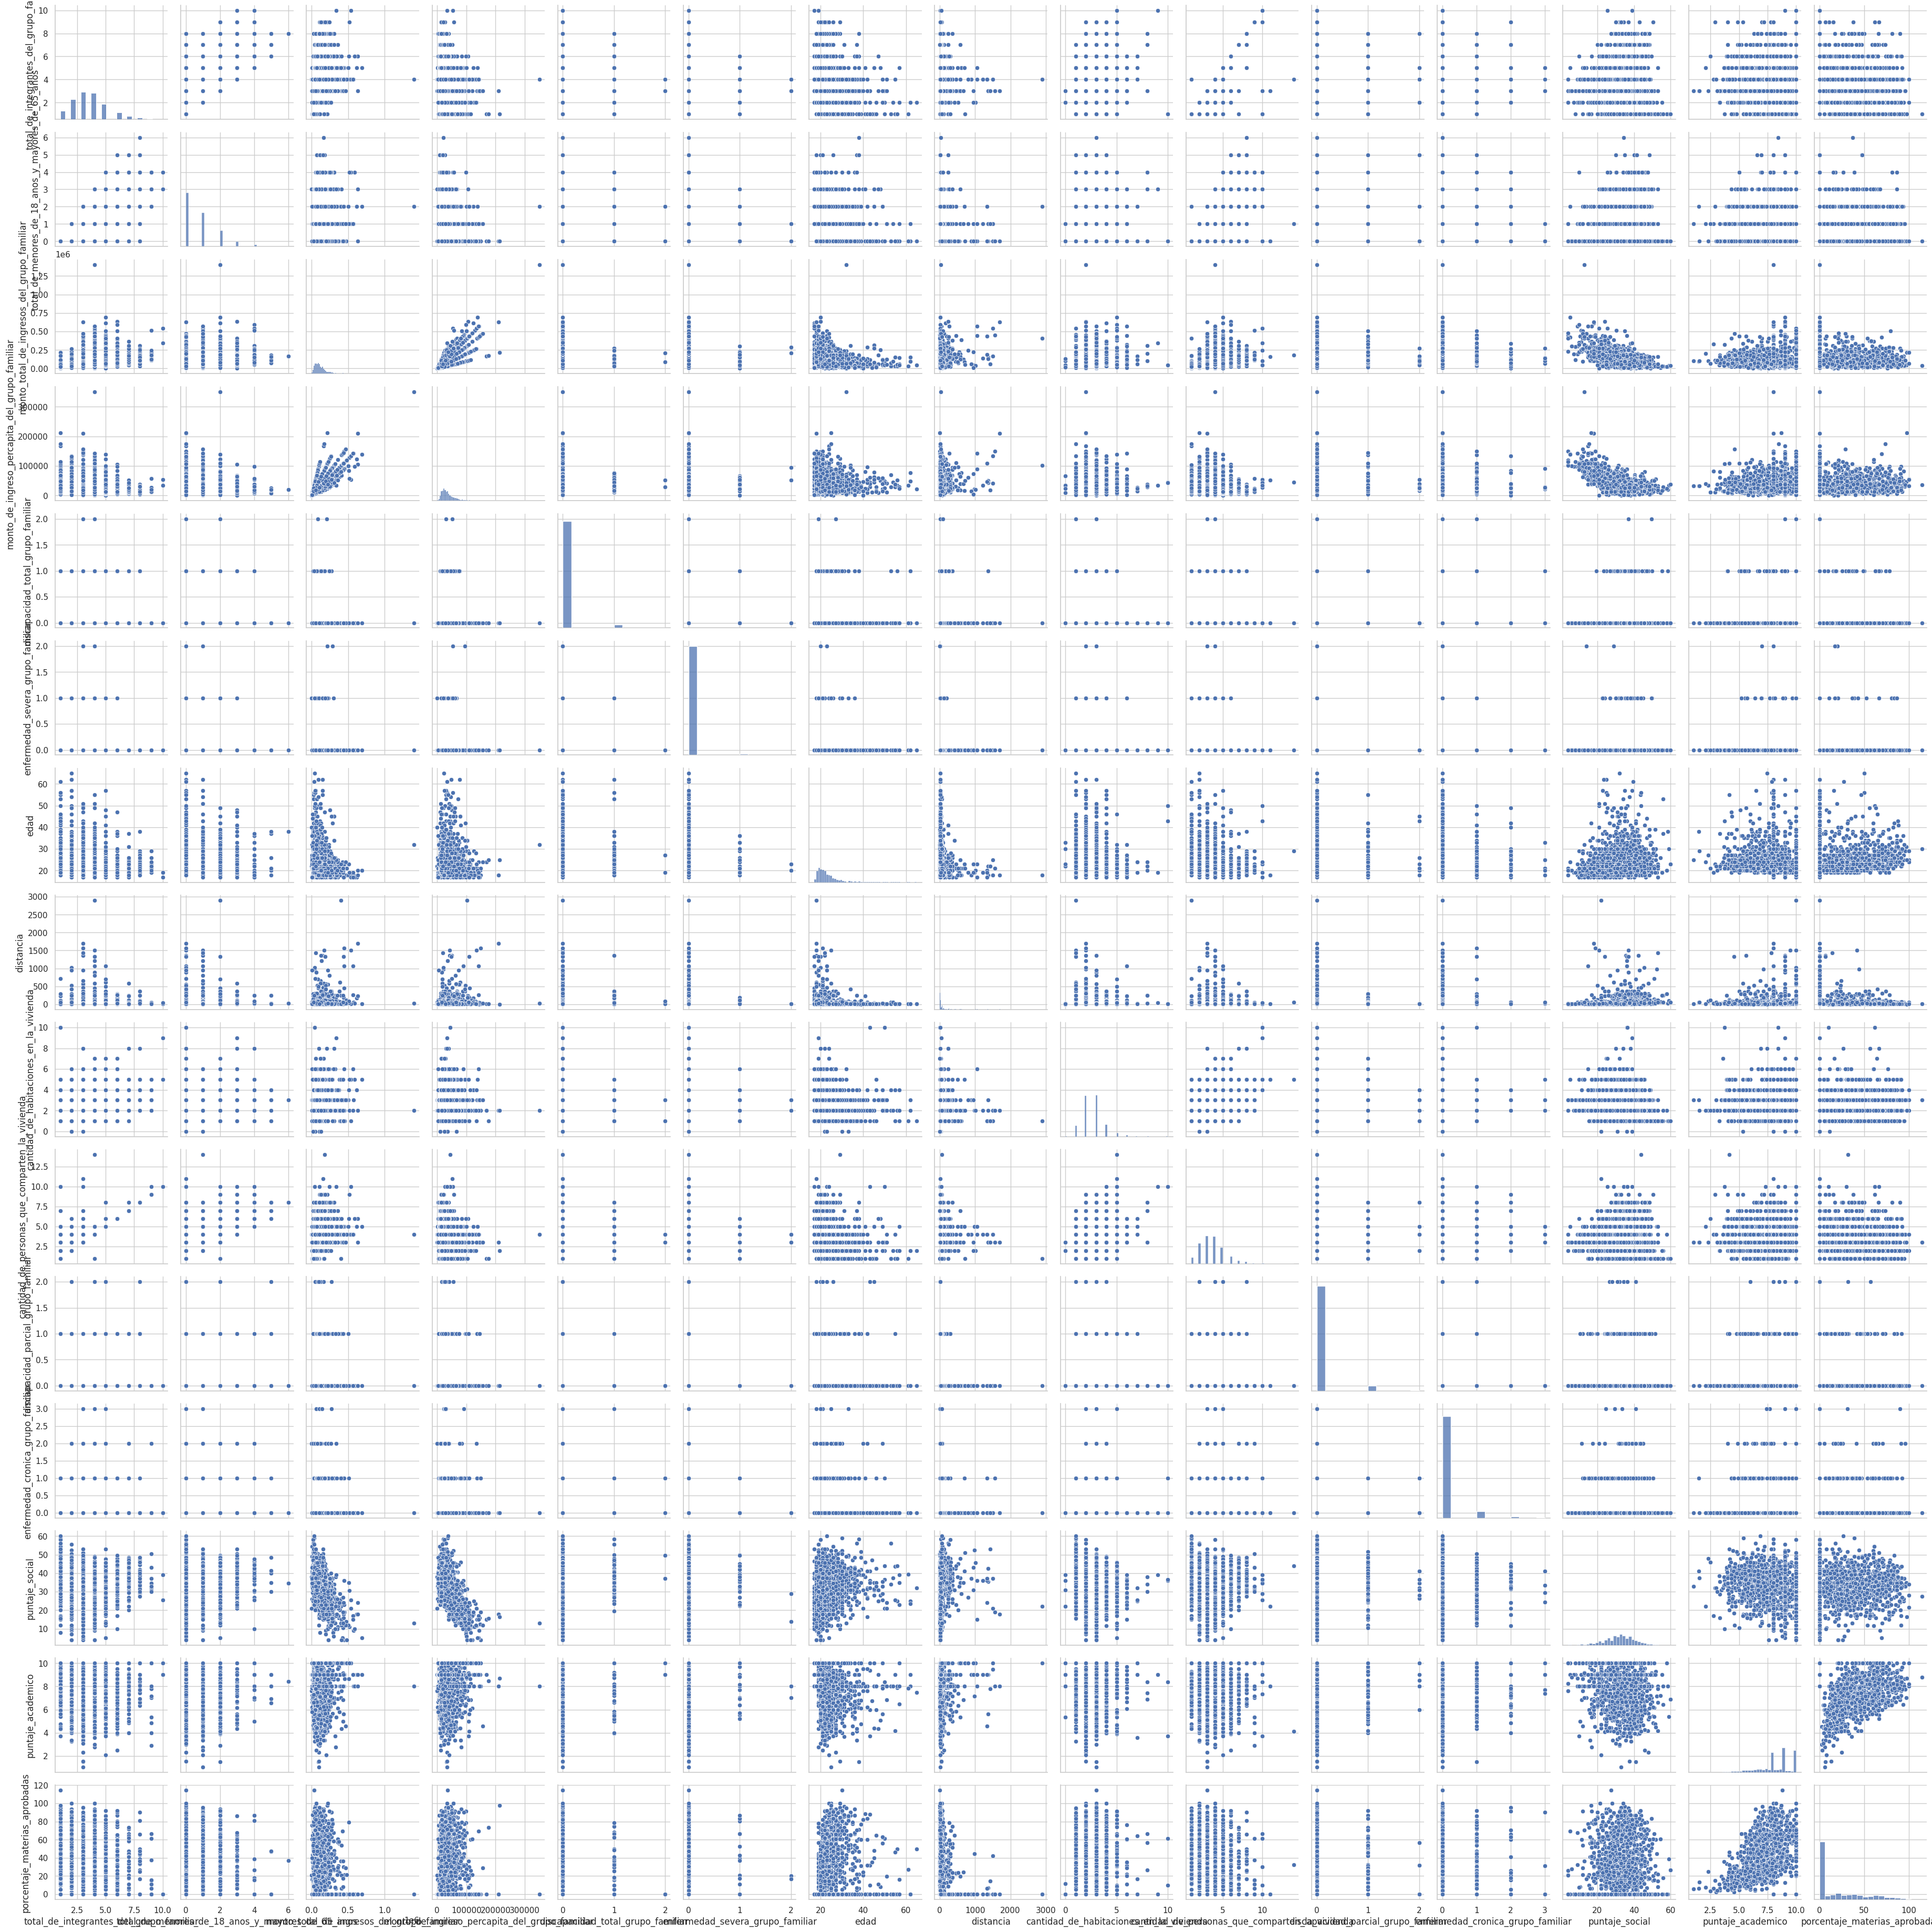

In [ ]:
# pairplot para todas las variables
import seaborn as sns
import matplotlib.pyplot as plt

# Excluir la columna 'dni'
becas2_sin_dni = becas2.drop(columns=['dni'], errors='ignore')

# Crear el pairplot sin la columna 'dni'
sns.pairplot(becas2_sin_dni)
plt.show()


In [ ]:
becas2.shape[1]

78

In [ ]:
# dimensiones finales
print(f"Dimensiones finales: ({becas2.shape[0]}, {becas2.shape[1]})")

Dimensiones finales: (2034, 78)


# Agrupacion de carreras, ocupaciones y localidad

In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.4 MB/s eta 0:00:00


In [ ]:
import unidecode
import re
# Función para limpiar y normalizar el texto
def limpiar_texto(texto):
    texto = str(texto).strip().lower() # Transforma a minuscula
    texto = unidecode.unidecode(texto)  # Elimina tildes
    texto = re.sub(r'[^a-z\s]', '', texto)  # Elimina caracteres especiales
    return texto

#aplicar limpiar texto para ocupacion_padretutor, ocupacion_madretutor y localidad
becas2['ocupacion_padretutor'] = becas2['ocupacion_padretutor'].apply(limpiar_texto)
becas2['ocupacion_madretutor'] = becas2['ocupacion_madretutor'].apply(limpiar_texto)
becas2['departamento_postulante'] = becas2['departamento_postulante'].apply(limpiar_texto)

In [ ]:
# #IGNORAR
# cno_2011_dict = {
#     "directores y gerentes": [
#         "miembros del poder ejecutivo y cuerpos legislativos",
#         "directores de departamentos administrativos y comerciales",
#         "directores de produccion y operaciones",
#         "directores y gerentes de empresas de alojamiento, restauracion y comercio",
#         "directores y gerentes de otras empresas de servicios"
#     ],
#     "tecnicos y profesionales cientificos e intelectuales de la salud y la enseñanza": [
#         "profesionales de la salud",
#         "profesionales de la enseñanza infantil, primaria, secundaria y postsecundaria",
#         "otros profesionales de la enseñanza"
#     ],
#     "otros tecnicos y profesionales cientificos e intelectuales": [
#         "profesionales de las ciencias fisicas, quimicas, matematicas y de las ingenierias",
#         "profesionales en derecho",
#         "especialistas en organizacion de la administracion publica y comercializacion",
#         "profesionales de las tecnologias de la informacion",
#         "profesionales en ciencias sociales",
#         "profesionales de la cultura y el espectaculo"
#     ],
#     "tecnicos; profesionales de apoyo": [
#         "tecnicos de las ciencias y de las ingenierias",
#         "supervisores en ingenieria de minas, industrias manufactureras y construccion",
#         "tecnicos sanitarios y profesionales de las terapias alternativas",
#         "profesionales de apoyo en finanzas y matematicas",
#         "representantes, agentes comerciales y afines",
#         "profesionales de apoyo a la gestion administrativa y seguridad",
#         "profesionales de apoyo de servicios juridicos, sociales, culturales y deportivos",
#         "tecnicos de las tecnologias de la informacion y las comunicaciones (tic)"
#     ],
#     "empleados de oficina que no atienden al publico": [
#         "empleados en servicios contables, financieros y de produccion",
#         "empleados de bibliotecas, servicios de correos y afines",
#         "otros empleados administrativos sin tareas de atencion al publico"
#     ],
#     "empleados de oficina que atienden al publico": [
#         "empleados de agencias de viajes, recepcionistas y telefonistas",
#         "empleados administrativos con atencion al publico"
#     ],
#     "trabajadores de los servicios de restauracion y comercio": [
#         "camareros y cocineros propietarios",
#         "trabajadores asalariados de los servicios de restauracion",
#         "dependientes en tiendas y almacenes",
#         "comerciantes propietarios de tiendas",
#         "vendedores (excepto en tiendas y almacenes)",
#         "cajeros y taquilleros (excepto bancos)"
#     ],
#     "trabajadores de los servicios de salud y el cuidado de personas": [
#         "trabajadores de los cuidados a las personas en servicios de salud",
#         "otros trabajadores de los cuidados a las personas",
#         "trabajadores de los servicios personales"
#     ],
#     "trabajadores de los servicios de proteccion y seguridad": [
#         "trabajadores de los servicios de proteccion y seguridad"
#     ],
#     "trabajadores cualificados en el sector agricola, ganadero, forestal y pesquero": [
#         "trabajadores cualificados en actividades agricolas",
#         "trabajadores cualificados en actividades ganaderas",
#         "trabajadores cualificados en actividades agropecuarias mixtas",
#         "trabajadores cualificados en actividades forestales, pesqueras y cinegeticas"
#     ],
#     "trabajadores cualificados de la construccion, excepto operadores de maquinas": [
#         "trabajadores en obras estructurales de construccion",
#         "trabajadores de acabado de construcciones e instalaciones"
#     ],
#     "trabajadores cualificados de las industrias manufactureras": [
#         "soldadores, chapistas, montadores de estructuras metalicas",
#         "mecanicos y ajustadores de maquinaria",
#         "trabajadores especializados en electricidad y electrotecnologia",
#         "mecanicos de precision, ceramistas, vidrieros, artesanos y graficos",
#         "trabajadores de la industria de la alimentacion, bebidas y tabaco",
#         "trabajadores de la madera, textil, confeccion, piel y calzado"
#     ],
#     "operadores de instalaciones y maquinaria fija, y montadores": [
#         "operadores de instalaciones y maquinaria fija",
#         "montadores y ensambladores en fabricas"
#     ],
#     "conductores y operadores de maquinaria movil": [
#         "maquinistas de locomotoras, operadores de maquinaria agricola y pesados",
#         "conductores de vehiculos para el transporte urbano o por carretera"
#     ],
#     "trabajadores no cualificados en servicios (excepto transportes)": [
#         "empleados domesticos",
#         "otro personal de limpieza",
#         "ayudantes de preparacion de alimentos",
#         "recogedores de residuos urbanos, vendedores callejeros y otras ocupaciones"
#     ],
#     "peones de la agricultura, pesca, construccion, industrias manufactureras y transportes": [
#         "peones agrarios, forestales y de la pesca",
#         "peones de la construccion y de la mineria",
#         "peones de las industrias manufactureras",
#         "peones del transporte, descargadores y reponedores"
#     ],
#     "otros": [
#         ""
#     ]
# }

In [ ]:
# cno_2011_dict = {
#     "director y gerente": [
#         "miembros del poder ejecutivo y cuerpos legislativos",
#         "director de departamentos administrativo y comerciales",
#         "director de produccion y operaciones",
#         "director y gerente de empresas de alojamiento, restauracion y comercio",
#         "director y gerente de otras empresas de servicios"
#     ],
#     "tecnico y profesional cientifico e intelectual de la salud y la enseñanza": [
#         "profesional de la salud",
#         "profesional de la enseñanza infantil, primaria, secundaria y postsecundaria",
#         "otros profesional de la enseñanza"
#     ],
#     "otros tecnico y profesional cientifico e intelectual": [
#         "profesional de las ciencias fisicas, quimicas, matematicas y de las ingenierias",
#         "profesional en derecho",
#         "especialista en organizacion de la administracion publica y comercializacion",
#         "profesional de las tecnologias de la informacion",
#         "profesional en ciencias sociales",
#         "profesional de la cultura y el espectaculo"
#     ],
#     "tecnico; profesional de apoyo": [
#         "tecnico de las ciencias y de las ingenierias",
#         "supervisores en ingenieria de minas, industrias manufactureras y construccion",
#         "tecnico sanitarios y profesional de las terapias alternativas",
#         "profesional de apoyo en finanzas y matematicas",
#         "representante, agentes comerciales y afines",
#         "profesional de apoyo a la gestion administrativa y seguridad",
#         "profesional de apoyo de servicios juridicos, sociales, culturales y deportivos",
#         "tecnico de las tecnologias de la informacion y las comunicaciones (tic)"
#     ],
#     "empleado de oficina que no atienden al publico": [
#         "empleado en servicios contables, financieros y de produccion",
#         "empleado de bibliotecas, servicios de correos y afines",
#         "otros empleado administrativo sin tareas de atencion al publico"
#     ],
#     "empleado de oficina que atienden al publico": [
#         "empleado de agencias de viajes, recepcionistas y telefonistas",
#         "empleado administrativo con atencion al publico"
#     ],
#     "trabajador de los servicios de restauracion y comercio": [
#         "camareros y cocineros propietarios",
#         "trabajador asalariado de los servicios de restauracion",
#         "dependiente en tiendas y almacenes",
#         "comerciante propietarios de tiendas",
#         "vendedor (excepto en tiendas y almacenes)",
#         "cajeros y taquilleros (excepto bancos)"
#     ],
#     "trabajador de los servicios de salud y el cuidado de personas": [
#         "trabajador de los cuidados a las personas en servicios de salud",
#         "otro trabajador de los cuidados a las personas",
#         "trabajador de los servicios personales"
#     ],
#     "trabajador de los servicios de proteccion y seguridad": [
#         "trabajador de los servicios de proteccion y seguridad"
#     ],
#     "trabajador cualificados en el sector agricola, ganadero, forestal y pesquero": [
#         "trabajador cualificados en actividades agricolas",
#         "trabajador cualificados en actividades ganaderas",
#         "trabajador cualificados en actividades agropecuarias mixtas",
#         "trabajador cualificados en actividades forestales, pesqueras y cinegeticas"
#     ],
#     "trabajador cualificados de la construccion, excepto operador de maquinas": [
#         "trabajador en obras estructurales de construccion",
#         "trabajador de acabado de construcciones e instalaciones"
#     ],
#     "trabajador cualificados de las industrias manufactureras": [
#         "soldador, chapista, montador de estructuras metalicas",
#         "mecanico y ajustador de maquinaria",
#         "trabajador especializados en electricidad y electrotecnologia",
#         "mecanico de precision, ceramistas, vidrieros, artesanos y graficos",
#         "trabajador de la industria de la alimentacion, bebidas y tabaco",
#         "trabajador de la madera, textil, confeccion, piel y calzado"
#     ],
#     "operador de instalaciones y maquinaria fija, y montadores": [
#         "operador de instalaciones y maquinaria fija",
#         "montadores y ensambladores en fabricas"
#     ],
#     "conductor y operador de maquinaria movil": [
#         "maquinista de locomotoras, operador de maquinaria agricola y pesados",
#         "conductor de vehiculos para el transporte urbano o por carretera"
#     ],
#     "trabajador no cualificados en servicios (excepto transportes)": [
#         "empleado domesticos",
#         "otro personal de limpieza",
#         "ayudantes de preparacion de alimentos",
#         "recogedores de residuos urbanos, vendedore callejeros y otras ocupaciones"
#     ],
#     "peon de la agricultura, pesca, construccion, industrias manufactureras y transportes": [
#         "peon agrario, forestal y de la pesca",
#         "peon de la construccion y de la mineria",
#         "peon de las industri manufacturer",
#         "peon del transporte, descargador y reponedor"
#     ],
#     "otros": [
#         ""
#     ]
# }

In [ ]:
# # Excepciones manuales

# cno_2011_dict["tecnico y profesional cientifico e intelectual de la salud y la enseñanza"].extend(["docente", "maestro", "profesor", "educador"])
# cno_2011_dict["trabajador de los servicios de salud y el cuidado de personas"].extend(["auxiliar geriatrico", "cuidador", "enfermero auxiliar"])


In [ ]:
# Función para limpiar y normalizar el texto
def limpiar_texto(texto):
    texto = str(texto).strip().lower() # Transforma a minuscula
    texto = unidecode.unidecode(texto)  # Elimina tildes
    texto = re.sub(r'[^a-z\s]', '', texto)  # Elimina caracteres especiales
    # borraba espacios
    return texto

In [ ]:
import pandas as pd
import re

def clasificar_ocupacion2(ocupacion):
    ocupacion = limpiar_texto(ocupacion)
    # if pd.isna(ocupacion) or ocupacion in ('-', '.', 'sin datos', 'Sin Datos') or not re.search(r'[a-zA-Z]', str(ocupacion)):
    #     return 'Sin Clasificacion'

    # ocupacion = ocupacion.lower()

    # if re.search(r'\b(desconocid|no tiene|no hay|vacío|no disponible)\b', ocupacion):
    #     return "Sin Clasificacion"

    if re.search(r'falleci|no vive|difunt|discapaci|invalid', ocupacion):
        return '12 - No se perciben ganancias'

    # Se deja al final para evitar clasificar mal ocupaciones que contienen "no" como "cirujano".
    if re.search(r'desconocid|no tiene|no hay|no posee|no tengo|no tiene|no se|nose|secundario completo|no|vacío|no disponible', ocupacion):
        return '12 - No se perciben ganancias'

    if re.search(r'music|encargado de edificio|chap|mertalug|metalurg|panad|mosaista|cerraje|zapat|cerraj|carpin|soder|carnic|constru|gasist|fotograf|mantenimi|jardine|ladrill|albañil|albanil|artesan|tractorist|independient|yeser|mecanic|electricist|plomer|carpinter|mecanic|soldador|pintor|herrero|constructor|instalad|contratist|mosaista|panadero|tapicero|limpiador|albañil|albanil|carpintero|feriante|cafetero|vinatero|reparacion|supervisor de obra|durklero|criador|heladero|parrillero', ocupacion):
        return '7 - Oficiales, operarios y artesanos'

    if re.search(r'agric|chacra|rural|chaca|peon|apicultor|vin|viti|finca|criador de animales|enolo|agric|bodeg|agricultor|operar|ganader|pesquer|campesin|horticultor|cultivador|productor agricola|agronom|agric|rural|jornalero', ocupacion):
        return '9 - Agricultores y trabajadores calificados'

    if re.search(r'sociolo|educa|audiovisual|teolog|profesor|instruct|maestr|docent|docente|educador|capacitador|tutor|mentor|pedagog|preceptor', ocupacion):
        return '3 - Profesionales científicos e intelectuales - educacion'

    if re.search(r'deposit|bodeg|maquinis|chof|tecnico mec|transportist|taxista|camioner|logistica|mensajer|conductor|entregador|mecanic|operador|perforista|ascensor|refrigera', ocupacion):
        return '6 - Operadores de instalaciones y máquinas'

    if re.search(r'ingeni|mecani|electr|mecatr|metal|arquitect|tecnic|programador|desarrollador|sistema|tecnolog|software|informatic|hardware|web', ocupacion):
        return '1 - Profesionales científicos e intelectuales - Tecnología'

    if re.search(r'biomedic|medic|farmac|doctor|enfermer|salud|fisioterapeuta|veterinari|farmaceutic|nutricionist|psicolog|terapeut|oftalmolog|kinesiolo|quirurg|sanid|sanit|odonto|bromato|hemo|oftal|onco|dialis|pediatr|cardio|derma|otorri|psi|gine|radiol|fisio|rehab|endocri|neuro|ciruj|educacion fisica', ocupacion):
        return '2 - Profesionales científicos e intelectuales - salud'

    if re.search(r'seguro|estilis|inmobilia|supermerc|gastron|seguridad|vigil|sereno|comerc|vendedor|venta|comerciante|repart|negocio|emprendedor|merc|representante|distribuidor', ocupacion):
        return '4 - Trabajadores de los servicios y vendedores'

    if re.search(r'tesorer|bancari|bibliotecari|coord|atencion|personal|contador|dependencia|administra|municip|empleado publico|empleado municipal|empleado estatal|finanza|banco|economist|analista|auditor|recursos humanos|secretari|gerente|director|ejecutivo de cuenta', ocupacion):
        return '5 - Personal de apoyo administrativo'

    if re.search(r'rapi|reposi|quios|kios|pastor|iglesia|celad|porter|apoyo|proteccion|empaque', ocupacion):
        return '8 - Trabajadores no calificados'

    if re.search(r'preventis|cocin|chef|meser|mozo|hotel|bomber|recepcionist|bartender|turis|conserj', ocupacion):
        return '10 - Trabajadores de los servicios y vendedores'

    if re.search(r'mili|gendar|peniten|polic|peniten|funcionari|municip|servidor publico|gobierno|ministeri|diputad|concejal|alcald|subsecretari|juez|ejecut|judicial', ocupacion):
        return '11 - Miembros del poder ejecutivo y directivo'

    if re.search(r'desenplead|desemplead|sin trabajo|ningun|no trabaja|desocupad|buscando empleo|hogar|casa|cuidador|sin empleo', ocupacion):
        return '12 - No se perciben ganancias'

    if re.search(r'jubilado|pensionad|trabajador|obrero construcción|obreros|ayud|chang|dependen|emplead|obrero|empleado de oficina|trabajo manual|tareas básicas|trabajador de planta', ocupacion):
        return '13 - Otros'

    # En caso de que no coincida nada
    return '13 - Otros'

In [ ]:
df = becas2.copy()
# Aplicar clasificación
df['ocupacion_madretutor'] = df['ocupacion_madretutor'].apply(clasificar_ocupacion2)
df['ocupacion_padretutor'] = df['ocupacion_padretutor'].apply(clasificar_ocupacion2)

# # Contar por categoría
# result = df.groupby('categoria_ocupacion').size().reset_index(name='total')

# # Mostrar resultado
# print(result)

In [ ]:
# # mostrar solo valores unicos de categoria_ocupacion
# df['ocupacion_madretutor'].unique()
# df['ocupacion_padretutor'].unique()

array(['13 - Otros', '5 - Personal de apoyo administrativo',
       '6 - Operadores de instalaciones y máquinas',
       '7 - Oficiales, operarios y artesanos',
       '12 - No se perciben ganancias',
       '3 - Profesionales científicos e intelectuales - educacion',
       '9 - Agricultores y trabajadores calificados',
       '4 - Trabajadores de los servicios y vendedores',
       '8 - Trabajadores no calificados',
       '1 - Profesionales científicos e intelectuales - Tecnología',
       '10 - Trabajadores de los servicios y vendedores',
       '11 - Miembros del poder ejecutivo y directivo',
       '2 - Profesionales científicos e intelectuales - salud'],
      dtype=object)

In [ ]:
# buscar todos los valores dentro de categoria_ocupacion que contengan "encargado"
# df[df['ocupacion_padretutor'].str.contains('encargado')]

In [ ]:
# # print(df[df['categoria_ocupacion'] == '8 - Trabajadores no calificados'][['ocupacion_padretutor', 'categoria_ocupacion']].to_string(index=False, header=False))
# df[df['categoria_ocupacion'] == '12 - No se perciben ganancias'][['ocupacion_padretutor']].drop_duplicates()

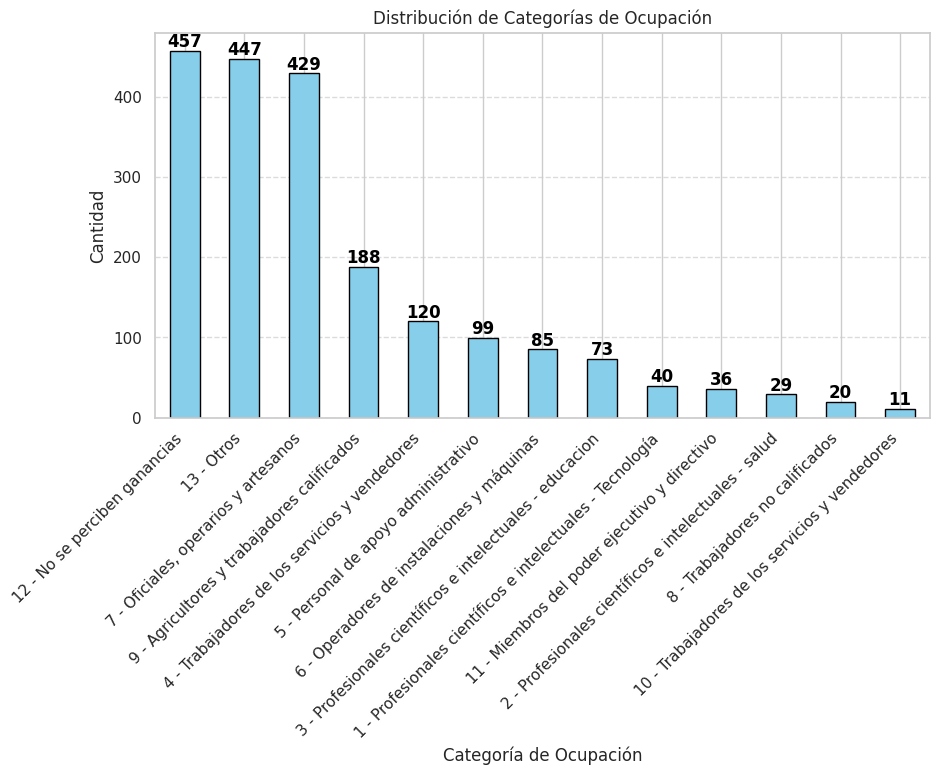

In [ ]:
import matplotlib.pyplot as plt

# Crear gráfico de barras
ax = df['ocupacion_padretutor'].value_counts().plot(kind='bar', figsize=(10, 5), color='skyblue', edgecolor='black')

# Añadir etiquetas con los valores en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Mejoras visuales
plt.xlabel("Categoría de Ocupación")
plt.ylabel("Cantidad")
plt.title("Distribución de Categorías de Ocupación")
plt.xticks(rotation=45, ha='right')  # Ajustar la alineación de las etiquetas rotadas
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.nunique()

carrera                                                             119
unidad_academica                                                     13
fuente_de_ingreso_grupo_familiar                                      6
otorgada_conectividad_dispositivo                                     4
otorgada_comedor                                                      4
otorgada_discapacidad                                                 4
otorgada_escalonada_por_tramos                                        4
otorgada_identidades_plurales                                         4
otorgada_jardin_maternal                                              4
otorgada_jovenes_de_pueblos_originarios_y_escuelas_rurales            3
otorgada_residencia_universitaria                                     4
confirmo_notificacion                                                 2
solicita_conectividad_dispositivo                                     2
ocupacion_padretutor                                                 13
comparte_la_computadora                                               2
tenes_un_trabajo_remunerado                                           2
trabajas_en_horario_nocturno_o_rotativo                               2
tenes_vacaciones_pagas                                                2
tenes_mas_de_un_empleo_o_actividad_rentada                            2
haces_aporte_jubilatorio                                              2
realizas_trabajo_no_remunerado                                        2
realizas_tareas_de_cuidado_no_remuneradas_vinculadas_a_personas       2
maximo_nivel_de_instruccion_madrepadretutor                           8
ocupacion_madretutor                                                 13
dispone_de_internet_dentro_del_hogar                                  2
total_de_integrantes_del_grupo_familiar                              10
total_de_menores_de_18_anos_y_mayores_de_65_anos                      7
monto_total_de_ingresos_del_grupo_familiar                         1677
monto_de_ingreso_percapita_del_grupo_familiar                      1746
postulante_presenta_problema_de_salud                                 2
enfermedad_declarada_por_el_postulante                                5
certificado_unico_de_discapacidad_del_postulante                      2
discapacidad_total_grupo_familiar                                     3
enfermedad_severa_grupo_familiar                                      3
dispone_de_computadora_en_el_hogar                                    2
dispone_de_luz_electrica_con_medidor                                  2
provincia_postulante                                                  7
nacionalidad                                                          2
edad                                                                 43
sexo                                                                  3
genero                                                                7
estado_civil                                                          5
coincide_el_domicilio_actual_dela_postulante_con_el_de_su_dni         2
departamento_postulante                                              29
postulante_se_mantiene_solao_y_no_tiene_familia_a_cargo               3
dispone_de_electricidad_en_el_interior_de_tu_vivienda                 2
distancia                                                           148
sede                                                                 10
vivienda_unipersonal_indica_si_vivis_soloa                            2
tipo_de_vivienda                                                      8
cantidad_de_habitaciones_en_la_vivienda                              11
cantidad_de_personas_que_comparten_la_vivienda                       12
dispone_de_servicio_de_agua_potable_en_el_interior                    2
dispone_de_gas_de_red                                                 2
discapacidad_parcial_grupo_familiar                                   3
enfermedad_cronica_grupo_familiar       

# Guardado

In [ ]:
df.to_csv('drive/MyDrive/proyecto_beca/becas_final_nonum_nopca.csv', index=False)